### Exercício de fixação - Regressão Linear

<h4> Esse notebook compreende exercício a partir da utilização de regressão linear. </h4>

Nosso exercício é uma regressão linear simples, analisando peso, altura e sexo biológico de 200 pessoas:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

Vamos começar lendo os dados do arquivo .csv denominado "weights.csv":

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving weights.csv to weights.csv
User uploaded file "weights.csv" with length 2022 bytes


In [3]:
pesos = pd.read_csv('weights.csv', sep=';')

Agora vamos performar alguns passos de análise exploratória, uma das bases da análise em Ciência de Dados e que também nos prepara para o termos um melhor funcionamento e entendimento quanto a nossos algoritmos de IA.

O primeiro passo é verificar uma parte (5 primeiros registros) que compõem nosso dataframe:

In [4]:
pesos.head()

,sex,weight,height
0,M,77,182
1,F,58,161
2,F,53,161
3,M,68,177
4,F,59,157


Agora, a partir do describe do Python, também podemos ter acesso a informações tais como quantidade geral de itens de dados, média, média ponderada, máximo e mínimo bem como nossos primeiro, segundo e terceiro quartis, 25%, 50% e 75%:

In [5]:
pesos.describe()

,weight,height
count,200.000000,200.00000
mean,65.770000,170.46500
std,14.899567,9.09408
min,39.000000,146.00000
25%,55.000000,164.00000
50%,63.000000,169.50000
75%,74.000000,177.25000
max,160.000000,197.00000


A partir do exposto, também podemos verificar valores específicos a partir de características específicas tal como verificar qual o máximo da característica (atributo) peso (weight) para o atributo sexo (sex) se constar como feminino (F). Exemplo:

In [6]:
pesos.loc[pesos.sex=='F']['weight'].max()

160

In [7]:
pesos['sex'].value_counts()

,count
sex,
F,112
M,88


Para ter mais possibilidades de análise de nossos dados uma boa prática é verificar nossos histogramas a partir de nosso dataframe. O modo mais simples de se fazer um histograma é do seguinte modo:

array([[<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'height'}>]], dtype=object)

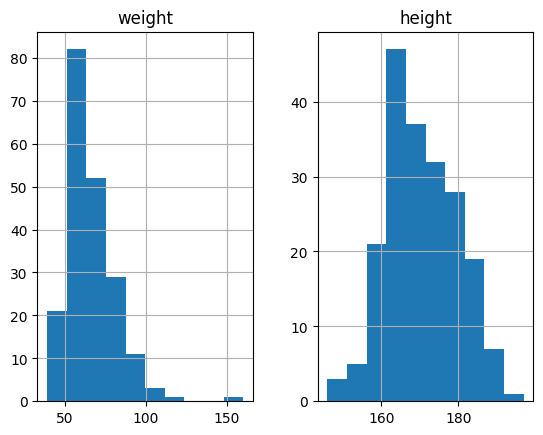

In [8]:
pesos.hist()

In [9]:
pesos.dtypes

,0
sex,object
weight,int64
height,int64


In [10]:
pesos.shape

(200, 3)

<Axes: >

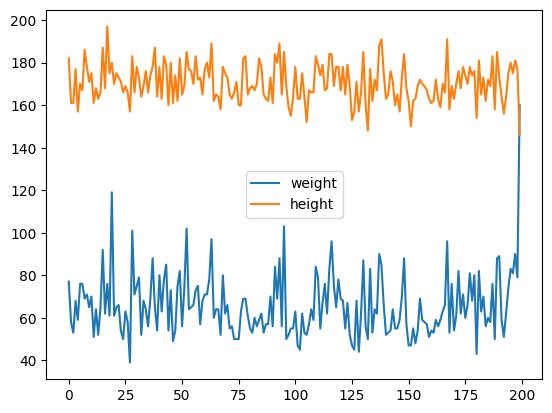

In [11]:
pesos.plot()

A fim de obtermos mais detalhes sobre os dados numéricos, podemos usar o método describe() novamente:

In [12]:
pesos.describe()

,weight,height
count,200.000000,200.00000
mean,65.770000,170.46500
std,14.899567,9.09408
min,39.000000,146.00000
25%,55.000000,164.00000
50%,63.000000,169.50000
75%,74.000000,177.25000
max,160.000000,197.00000


Com isso, obtemos o número de exemplos, a média de cada atributo, desvio padrão, valor mínimo, primeiro, segundo e terceiro quartil e valor máximo do atributo, respectivamente.

Para valores discretos podemos usar o método value_counts()

In [13]:
pesos.sex.value_counts()

,count
sex,
F,112
M,88


Logo, temos que nesta base temos 112 pessoas do sexo feminino e 88 do sexo masculino.

Vamos visualizar esses dados graficamente:

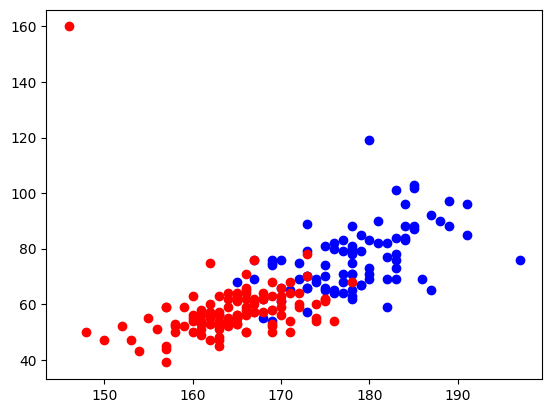

In [14]:
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'],
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'],
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')

Aqui encontramos um problema.

Existem alguns pontos muito fora da distribuição de dados (160, 120); esses pontos são nossos outliers.

Eles podem prejudicar o modelo, porque forçarão a reta para próximo deles.

Iremos então removê-los.

<br>Veja também que os pesos das pessoas de sexo masculino estão deslocados para a direita, o que indica uma tendência de homens serem mais pesados que as mulheres. Nosso modelo nos mostrará isso.

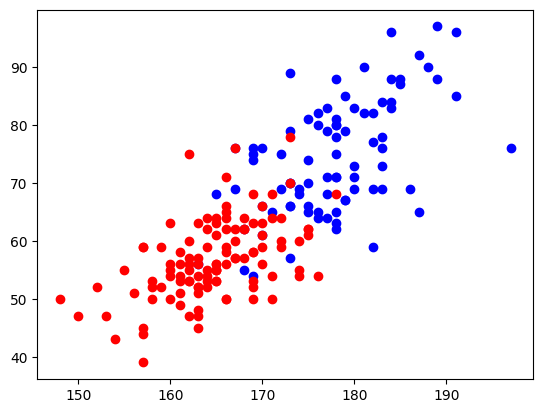

In [15]:
pesos = pesos[pesos.weight <= 100]
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'],
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'],
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')

Como visto em aula, para o caso de variáveis categóricas devemos utilizar "dummy variables". O método get_dummies do pandas cuida disso. Teremos um valor binário onde 1 corresponde a masculino e 0 a feminino

In [16]:
pesos.head()

,sex,weight,height
0,M,77,182
1,F,58,161
2,F,53,161
3,M,68,177
4,F,59,157


In [17]:
dummies_sex = pd.get_dummies(pesos.sex, drop_first=True)
dummies_sex.head()

,M
0,True
1,False
2,False
3,True
4,False


Anexamos as novas colunas à nossa base de dados.

Axis = 1 neste caso indica que queremos anexar colunas (usar 0 para linhas).

In [18]:
pesos = pd.concat([pesos, dummies_sex], axis=1)
pesos.head()

,sex,weight,height,M
0,M,77,182,True
1,F,58,161,False
2,F,53,161,False
3,M,68,177,True
4,F,59,157,False


Agora que tratamos os dados, podemos aplicar o método de regressão linear. Para isso especificamos qual será nossa variável dependente (y) e as variáveis independetes (X), ou atributos.

---



In [19]:
X = pesos[['weight', 'height']]
y = pesos.M

In [20]:
X.head()

,weight,height
0,77,182
1,58,161
2,53,161
3,68,177
4,59,157


In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

**[Desafio I]** - Faça as corretas modificações para que seja feita a predição também por meio de Árvore de Decisão

Podemos visualizar os coeficientes da reta:

In [22]:
lin_reg.coef_

array([0.01593571, 0.02416392])

In [23]:
lin_reg.intercept_

-4.712186171164943

#### **[Exemplo de caso de uso]**

De acordo com o que vimos na aula, abaixo estão alguns exemplos para cada caso a seguir:

I) Prever o peso de um homem de X quilos, de acordo com sua altura.
II) Prever o peso de uma mulher de X quilos, de acordo com sua altura.
III) Prever a altura de um homem de X metros, de acordo com seu peso.
IV) Prever a altura de uma mulher de X metros, de acordo com seu peso.

**[Desafio]** Faça as corretas modificações para que possamos fazer as predições também por meio de árvore de decisão.

In [24]:
X = pesos[['M', 'height']]
y = pesos.weight

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [25]:
print(f'O peso de um homem de 173cm {lin_reg.predict([[1, 173]])}')
print(f'O peso de um homem de 160cm {lin_reg.predict([[1, 160]])}')
print(f'O peso de uma mulher de 173cm {lin_reg.predict([[0, 173]])}')
print(f'O peso de uma mulher de 160cm {lin_reg.predict([[0, 160]])}')

O peso de um homem de 173cm [70.93469186]
O peso de um homem de 160cm [61.33140063]
O peso de uma mulher de 173cm [63.02122746]
O peso de uma mulher de 160cm [53.41793623]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
X = pesos[['M', 'weight']]
y = pesos.height

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [27]:
print(f'A altura de um homem de 80kg {lin_reg.predict([[1, 80]])}')
print(f'A altura de um homem de 100kg {lin_reg.predict([[1, 100]])}')
print(f'A altura de uma mulher de 60kg {lin_reg.predict([[0, 80]])}')
print(f'A altura de uma mulher de 100kg {lin_reg.predict([[0, 100]])}')

A altura de um homem de 80kg [179.90505369]
A altura de um homem de 100kg [187.63142752]
A altura de uma mulher de 60kg [173.62979679]
A altura de uma mulher de 100kg [181.35617062]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
